In [ ]:
# Import all necessary librarues
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE445/D1_healthcare-dataset-stroke-data.csv')

In [ ]:
# Understand the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5893 entries, 0 to 5892
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5893 non-null   int64  
 1   gender             5893 non-null   object 
 2   age                5893 non-null   float64
 3   hypertension       5893 non-null   int64  
 4   heart_disease      5893 non-null   int64  
 5   ever_married       5893 non-null   object 
 6   work_type          5893 non-null   object 
 7   Residence_type     5893 non-null   object 
 8   avg_glucose_level  5893 non-null   float64
 9   bmi                5552 non-null   float64
 10  smoking_status     5748 non-null   object 
 11  stroke             5893 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 552.6+ KB


In [ ]:
# Check for missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  341
smoking_status       145
stroke                 0
dtype: int64

In [ ]:
# We can see that there are 261 missing values in the 'bmi' column
# Dealing with missing values
# Fill the missing values in the 'bmi' column with the mean value

mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

df['smoking_status'].fillna('Unknown', inplace=True)

In [ ]:
# Check Null values again.
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Encoding categorical variables into Numerical values

df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)


In [ ]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_1,gender_2,ever_married_1,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_1,smoking_status_1,smoking_status_2,smoking_status_3
0,9046,0.884708,0,1,2.482412,1.016106e+00,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,0.625297,0,0,1.932005,-6.484416e-16,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,1.446765,0,1,-0.069455,4.675000e-01,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,0.106475,0,0,1.288062,7.217319e-01,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,1.403529,1,0,1.348133,-6.698531e-01,1,0,0,1,0,0,1,0,0,0,1,0


<Axes: xlabel='stroke', ylabel='count'>

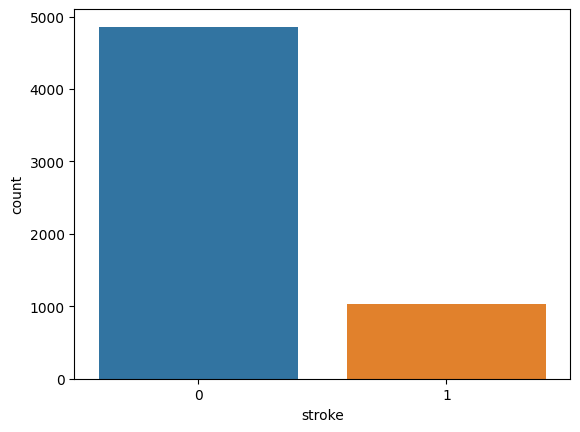

In [ ]:
# Plot Target variable distribution in Seaborn

import seaborn as sns

sns.countplot(x='stroke', data=df)

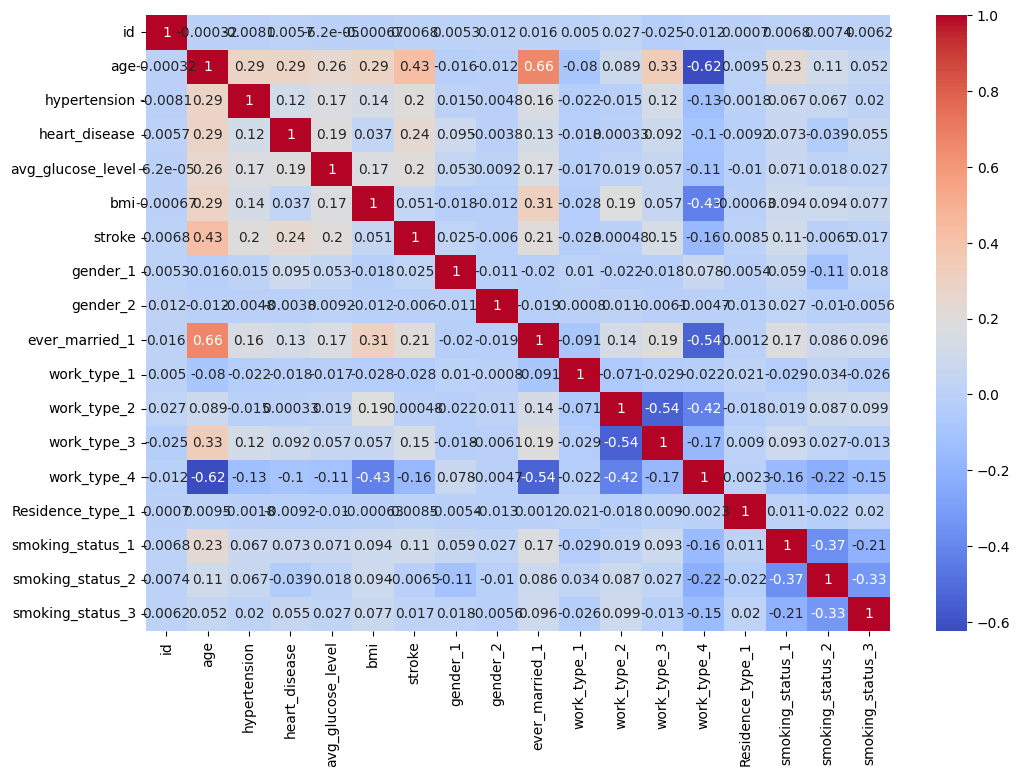

In [ ]:
# Dataset is highly imbalanced with only a small fraction of the samples having a stroke.
# Correlation Matrix

corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_1,gender_2,ever_married_1,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_1,smoking_status_1,smoking_status_2,smoking_status_3
0,9046,0.884708,0,1,2.482412,1.016106e+00,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,0.625297,0,0,1.932005,-6.580875e-16,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,1.446765,0,1,-0.069455,4.675000e-01,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,0.106475,0,0,1.288062,7.217319e-01,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,1.403529,1,0,1.348133,-6.698531e-01,1,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
print(df_encoded.columns)


Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


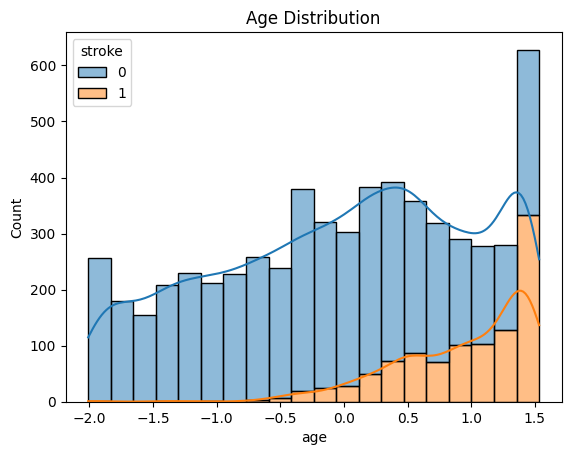

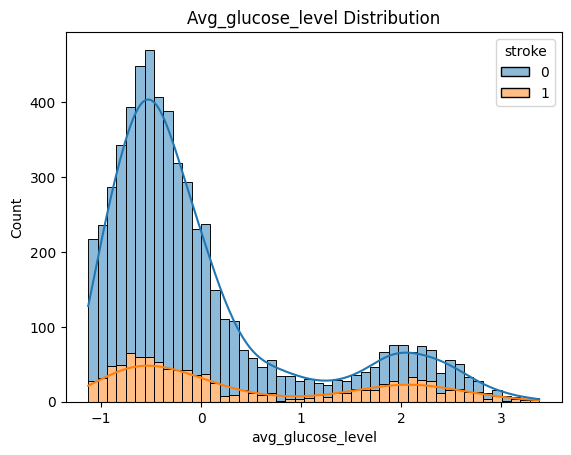

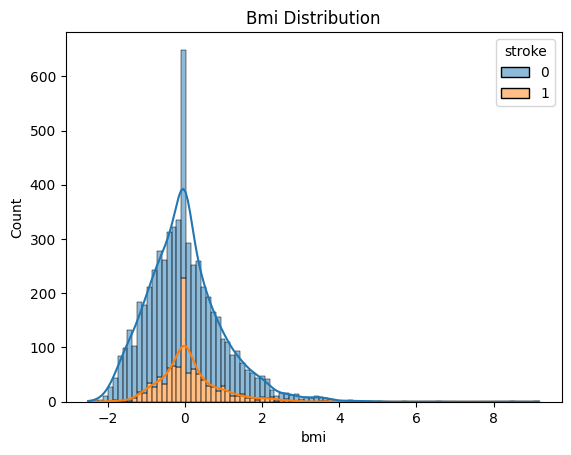

In [ ]:
# Plot Individual Histogram for the numerical features

num_features = ['age', 'avg_glucose_level', 'bmi']
for feature in num_features:
    plt.figure()
    sns.histplot(data=df, x=feature, hue='stroke', kde=True, multiple='stack')
    plt.title(feature.capitalize() + ' Distribution')
    plt.show()

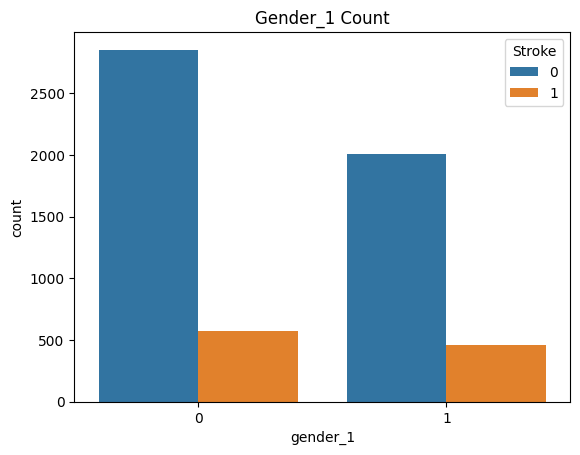

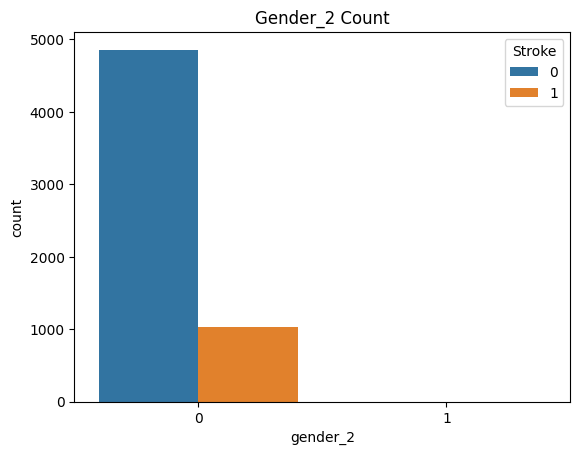

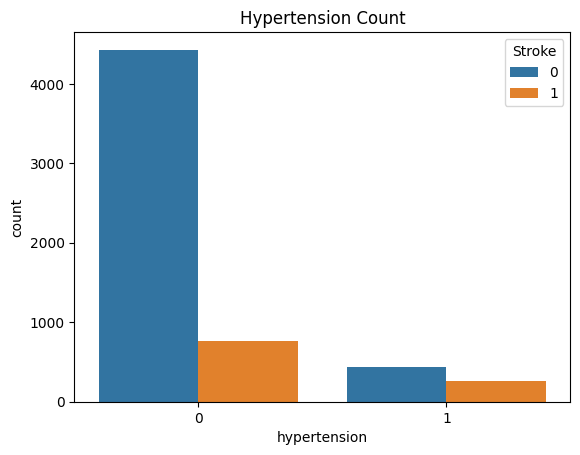

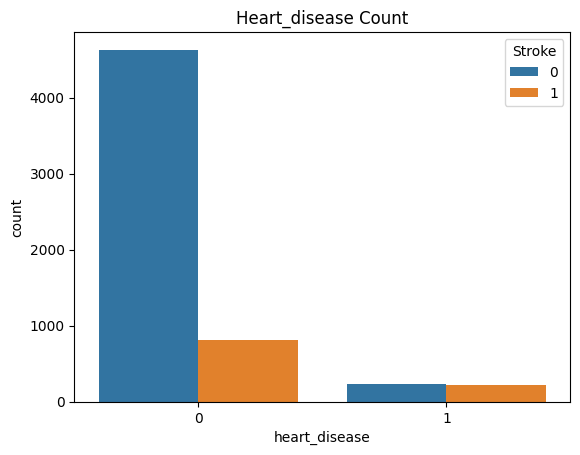

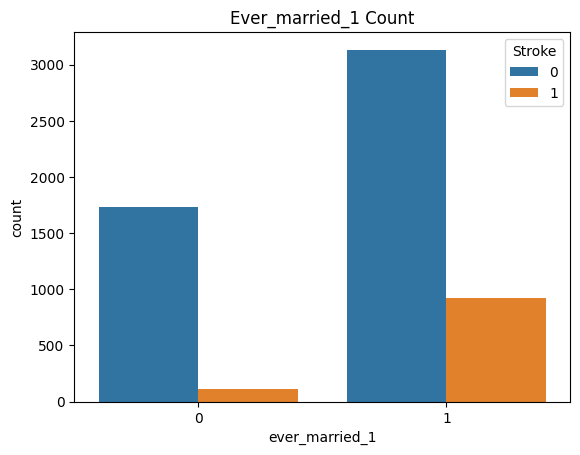

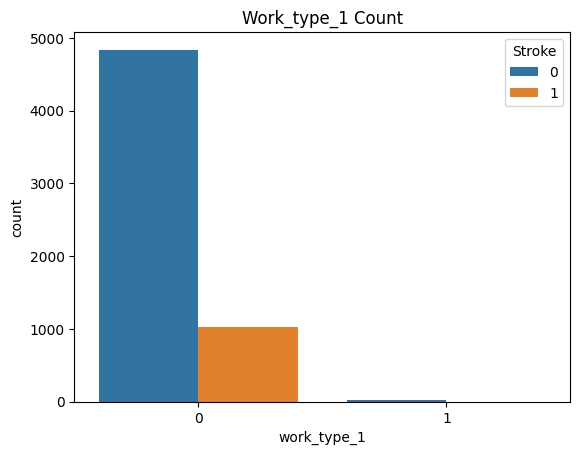

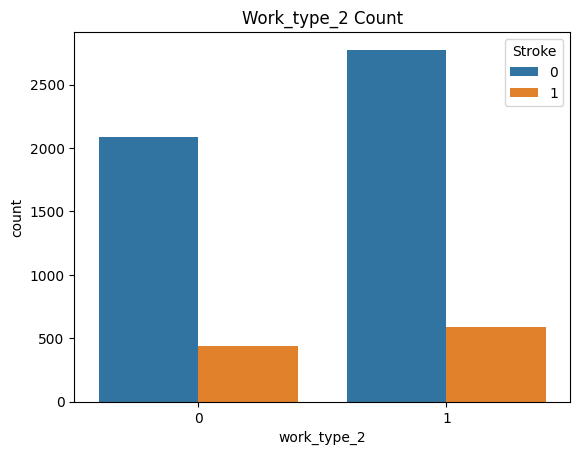

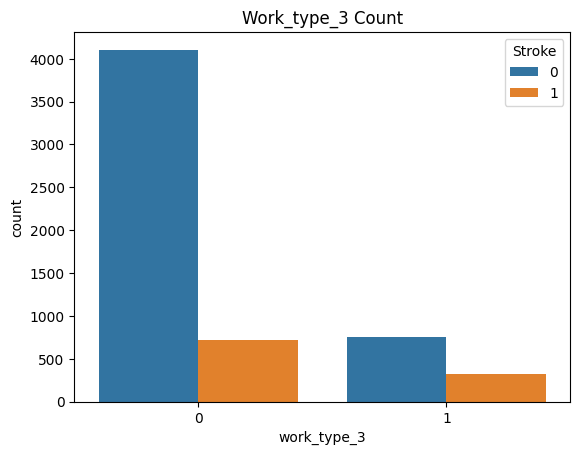

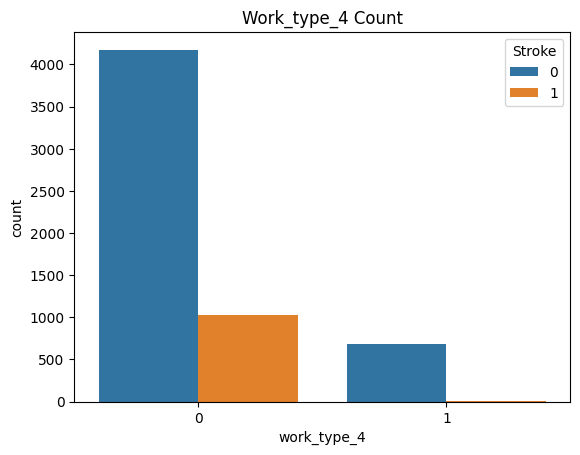

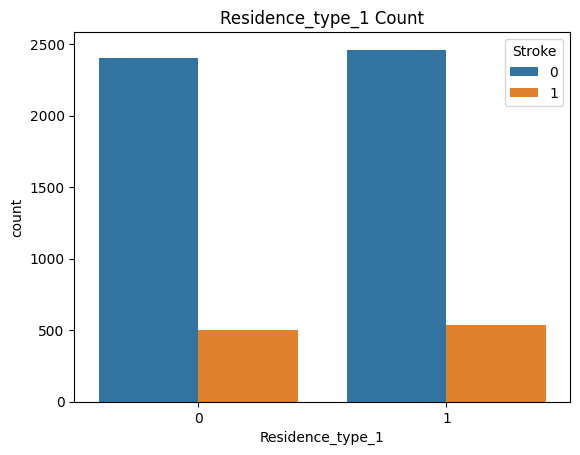

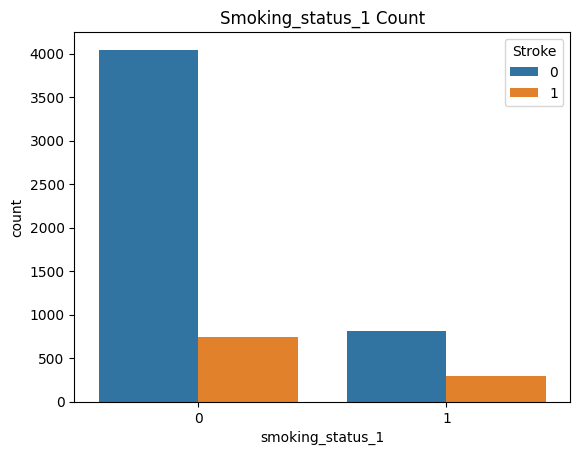

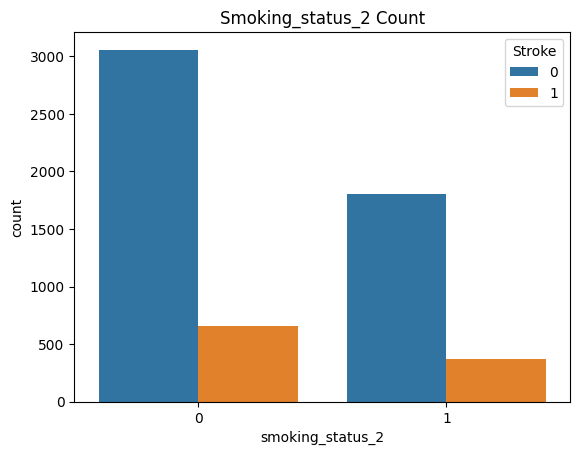

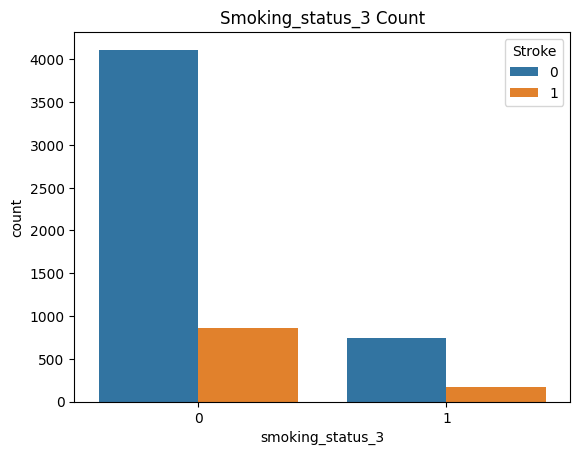

In [ ]:
# Plot individual bar charts for categorical features
import seaborn as sns

cat_features = ['gender_1','gender_2', 'hypertension', 'heart_disease', 'ever_married_1', 'work_type_1',	'work_type_2',	
                'work_type_3',	'work_type_4',	'Residence_type_1',	'smoking_status_1',	'smoking_status_2',	'smoking_status_3' ]
for feature in cat_features:
    plt.figure()
    sns.countplot(data=df, x=feature, hue='stroke')
    plt.title(feature.capitalize() + ' Count')
    plt.legend(title='Stroke', loc='upper right')
    plt.show()

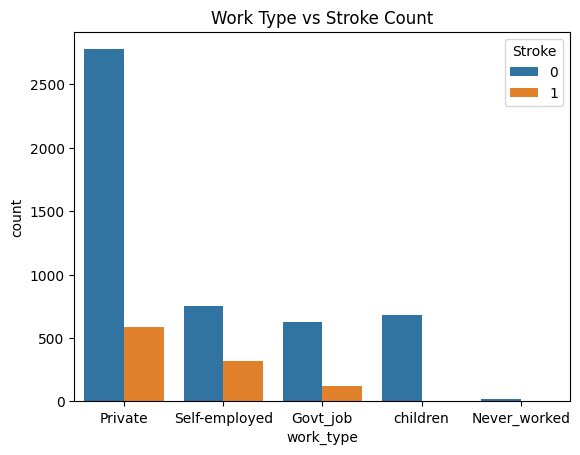

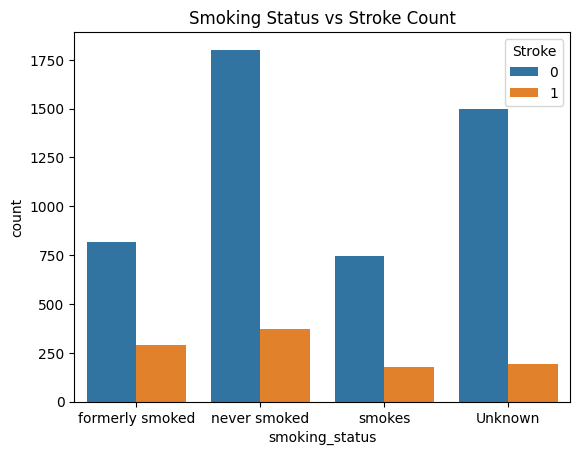

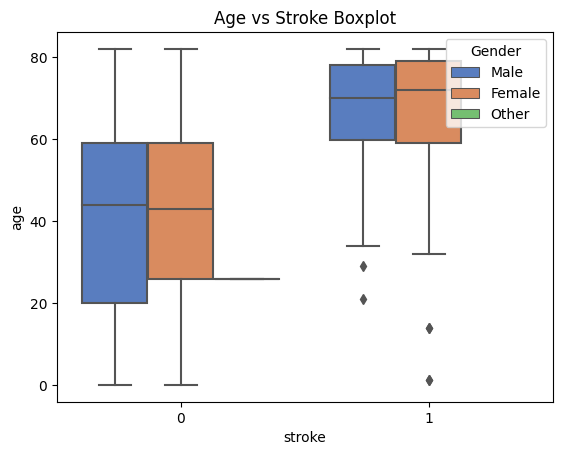

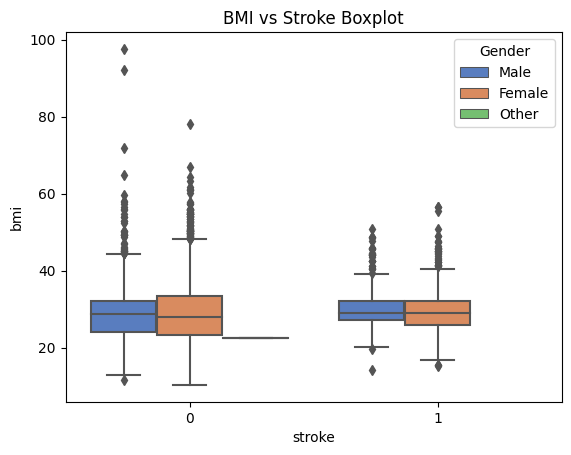

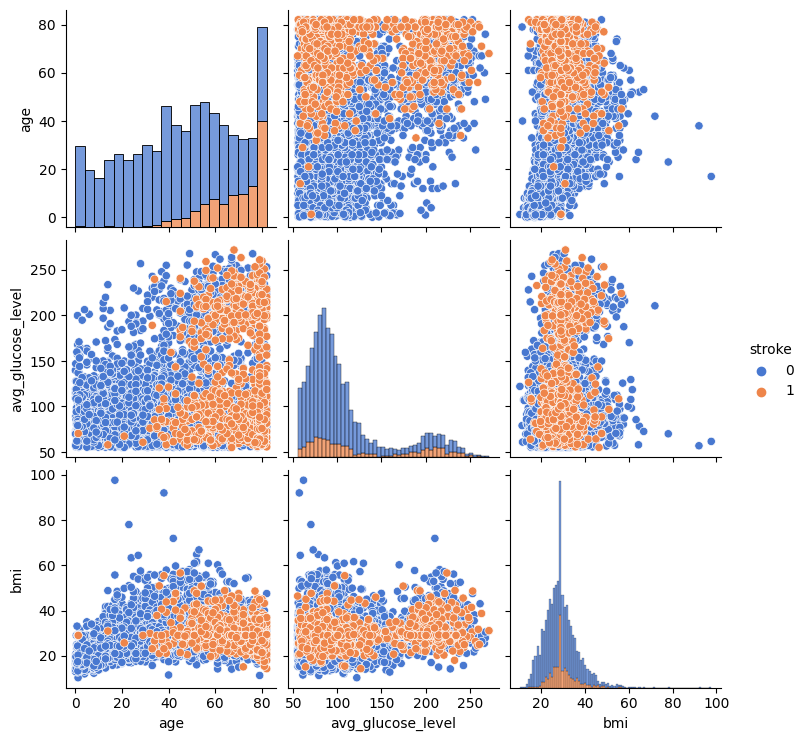

In [ ]:
# having a higher chances of strokes (such as 'hypertension', 'heart_disease', and 'smoking_status')
# others having a lower chances of strokes (such as 'ever_married' and 'Residence_type')

# Bar plot for Categorical vs Categorical  features 
# Categorical vs Numerical features( with different colors)
# Numerical vs Numerical feature pair plot


plt.figure()
sns.countplot(data=df, x='work_type', hue='stroke')
plt.title('Work Type vs Stroke Count')
plt.legend(title='Stroke', loc='upper right')

plt.figure()
sns.countplot(data=df, x='smoking_status', hue='stroke')
plt.title('Smoking Status vs Stroke Count')
plt.legend(title='Stroke', loc='upper right')

# Categorical vs numerical features
plt.figure()
sns.boxplot(data=df, x='stroke', y='age', hue='gender', palette='muted')
plt.title('Age vs Stroke Boxplot')
plt.legend(title='Gender', loc='upper right')

plt.figure()
sns.boxplot(data=df, x='stroke', y='bmi', hue='gender', palette='muted')
plt.title('BMI vs Stroke Boxplot')
plt.legend(title='Gender', loc='upper right')

# Numerical vs numerical features pair plot
num_features = ['age', 'avg_glucose_level', 'bmi']
sns.pairplot(data=df, vars=num_features, hue='stroke', diag_kind='hist', diag_kws={'multiple':'stack'}, palette='muted')

plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Apply normalization and standardization for numerical features

num_features = ['age', 'avg_glucose_level', 'bmi']

# Apply Min-Max scaling (normalization) to numerical features
scaler_minmax = MinMaxScaler()
df[num_features] = scaler_minmax.fit_transform(df[num_features])
print('\n\n Data after Min-Max scaling:\n\n')
df.head()



 Data after Min-Max scaling:




,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_1,gender_2,ever_married_1,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_1,smoking_status_1,smoking_status_2,smoking_status_3
0,9046,0.816895,0,1,0.801366,0.301260,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,0.743652,0,0,0.679186,0.214274,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,0.975586,0,1,0.234901,0.254296,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,0.597168,0,0,0.536243,0.276060,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,0.963379,1,0,0.549578,0.156930,1,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import  StandardScaler

num_features = ['age', 'avg_glucose_level', 'bmi']


# Apply z-score standardization to numerical features
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])
print('\n\n Data after z-score standardization:\n\n') 
df.head()



 Data after z-score standardization:




,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_1,gender_2,ever_married_1,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_1,smoking_status_1,smoking_status_2,smoking_status_3
0,9046,0.884708,0,1,2.482412,1.016106e+00,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,0.625297,0,0,1.932005,-6.580875e-16,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,1.446765,0,1,-0.069455,4.675000e-01,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,0.106475,0,0,1.288062,7.217319e-01,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,1.403529,1,0,1.348133,-6.698531e-01,1,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_1,gender_2,ever_married_1,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_1,smoking_status_1,smoking_status_2,smoking_status_3
0,9046,0.884708,0,1,2.482412,1.016106e+00,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,0.625297,0,0,1.932005,-6.580875e-16,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,1.446765,0,1,-0.069455,4.675000e-01,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,0.106475,0,0,1.288062,7.217319e-01,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,1.403529,1,0,1.348133,-6.698531e-01,1,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
# Apply Balancing technique ( SMOTE/ Oversampling / Undersampling ) in this dataset

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Convert categorical features to numerical using LabelEncoder
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Check the class distribution
print(df['stroke'].value_counts())

# Split the dataset into X and y
X = df.drop(['stroke'], axis=1)
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Over Sampling technique
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print('\n\nAfter Random Over Sampling:\n\n', y_resampled.value_counts())

# Apply Random Under Sampling technique
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
print('\n\nAfter Random Under Sampling:\n\n', y_resampled.value_counts())

# Apply SMOTE technique
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)
print('\n\nAfter SMOTE technique:\n\n', y_resampled.value_counts())

0    4861
1    1032
Name: stroke, dtype: int64


After Random Over Sampling:

 0    3910
1    3910
Name: stroke, dtype: int64


After Random Under Sampling:

 0    804
1    804
Name: stroke, dtype: int64


After SMOTE technique:

 0    3120
1    3120
Name: stroke, dtype: int64


In [ ]:
pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 54.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d7b481a723cc9d8f948304a19393e46626bf67d79dde30

In [ ]:
import pandas_profiling


# Generate pandas profiling report
profile = df.profile_report(title="Stroke Prediction Dataset Profile")

# Save the report as an HTML file
profile.to_file("stroke_prediction_dataset_profile.html")

<ipython-input-58-24402d613dff>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print(os.getcwd())

/content


In [ ]:
profile.to_file("/content/drive/MyDrive/CSE445/stroke_prediction_dataset_profile.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from IPython.display import display, HTML

# Specify the path to the HTML file
html_file = '/content/drive/MyDrive/CSE445/stroke_prediction_dataset_profile.html'

# Display the HTML file
display(HTML(filename=html_file))

Number of variables,18
Number of observations,5893
Missing cells,0
Missing cells (%),0.0%
Duplicate rows,249
Duplicate rows (%),4.2%
Total size in memory,385.7 KiB
Average record size in memory,67.0 B
Numeric,4
Categorical,14
Dataset has 249 (4.2%) duplicate rows,Duplicates


<Axes: xlabel='stroke', ylabel='count'>

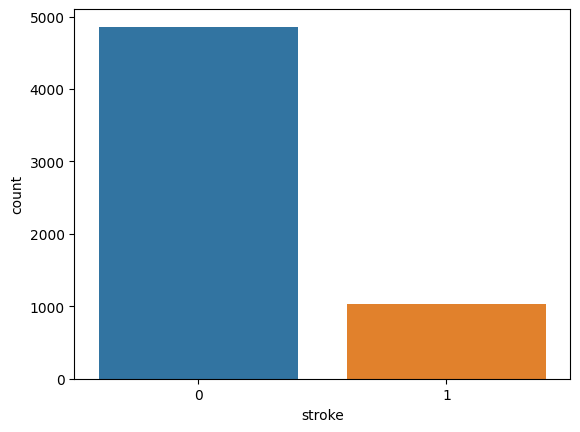

In [ ]:
# Plot Target variable distribution in Seaborn

import seaborn as sns

sns.countplot(x='stroke', data=df)